## *Marianne Trujillo Altamirano*
### *26/01/23*
# **A02**

# Ejercicios de optimización escalar

**Para la siguientes funciones encuentre los puntos críticos, grafique y diga si éste se trata de un máximo o mínimo, local o global.**

$f(x)=1260+117x-9x^2$

In [27]:
import sympy as sp
import numpy as np
sp.var("x")

def f(x):
    return 1260 + 117*x - 9*x**2
f(x)

-9*x**2 + 117*x + 1260

In [28]:
df= sp.diff(f(x),x) 
df

117 - 18*x

In [31]:
pc= sp.solve(df,x)
pc

[13/2]

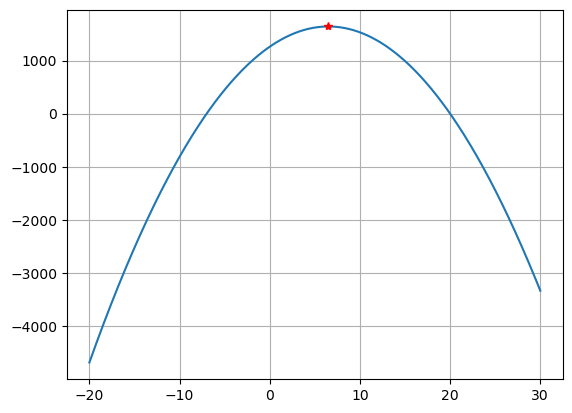

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

xn= np.linspace(-20,30,500)
yn= f(xn)

plt.figure()
plt.plot(xn,yn)
plt.grid()

plt.plot(pc[0],f(pc[0]), "*r") 
 

**R=** El punto crítico se trata de un máximo global

$f(x)=5+x+\frac{4}{x}$, para $x>0$

In [50]:
def f(x):
    return 5 + x + (4/x)

f(x)

x + 5 + 4/x

In [51]:
df= sp.diff(f(x),x) 
df

1 - 4/x**2

In [53]:
pc= sp.solve(df,x)
pc

[-2, 2]

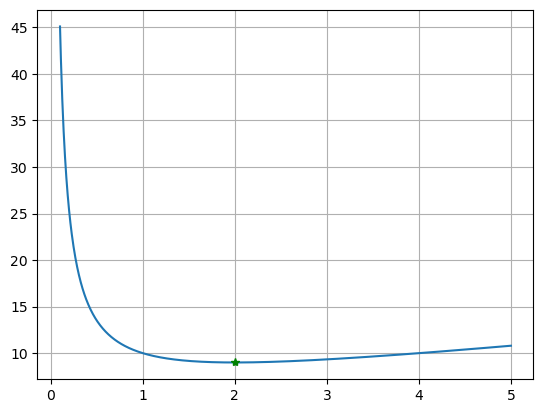

In [59]:
xn= np.linspace(0.1,5,1000)
yn= f(xn)

plt.figure()
plt.plot(xn,yn)
plt.grid()
 
plt.plot(pc[1],f(pc[1]), "*g")

**R=** El punto crítico se trata de un mínimo global

$f(x)=6-2x+\sqrt{18-2x^2}$, para $-3\leq x\leq 3$

In [67]:
sp.var ("x")
def f(x):
    return 6 - 2*x + sp.sqrt(18-2*x**2)
f(x)

-2*x + sqrt(18 - 2*x**2) + 6

In [68]:
df= sp.diff(f(x),x) 
df

-2*x/sqrt(18 - 2*x**2) - 2

In [74]:
pc= sp.solve (df,x)
pc

[-sqrt(6)]

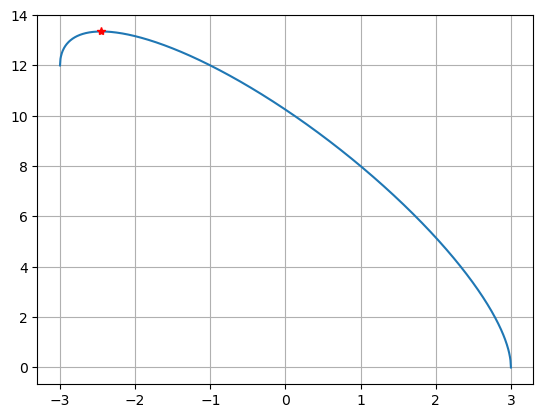

In [75]:
def f(x):
    return 6 - 2*x + np.sqrt(18-2*x**2)

xn= np.linspace(-3,3,1000)
yn= f(xn)

plt.figure()
plt.plot(xn,yn)
plt.grid()
 
plt.plot(-np.sqrt(6),f(-np.sqrt(6)), "*r")

**R=** El punto crítico se trata de un máximo global

$f(x)=\frac{1}{4}x^4+\frac{1}{3}x^3-x^2$ en el intervalo $[-3,1.7]$

In [76]:
sp.var ("x")
def f(x):
    return 1/4*x**4 + 1/3*x**3 - x**2
f(x)

0.25*x**4 + 0.333333333333333*x**3 - x**2

In [77]:
df= sp.diff(f(x),x) 
df

1.0*x**3 + 1.0*x**2 - 2*x

In [78]:
pc= sp.solve (df,x)
pc

[-2.00000000000000, 0.0, 1.00000000000000]

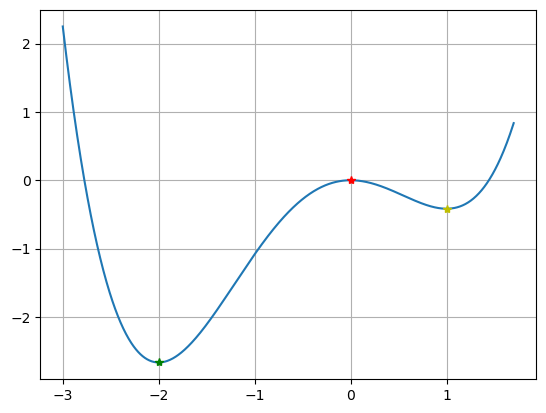

In [79]:
xn= np.linspace(-3,1.7,1000)
yn= f(xn)

plt.figure()
plt.plot(xn,yn)
plt.grid()
 
plt.plot(pc[0],f(pc[0]), "*g")
plt.plot(pc[1],f(pc[1]), "*r")
plt.plot(pc[2],f(pc[2]), "*y")

**R=** Tenemos 3 puntos críticos:
*-2* es un mínimo global,
*0* es un máximo global,
*1* es un mínimo local. 

---
**Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento.**

El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

*DEFINIMOS LA FUNCIÓN DEL PERÍMETRO*

In [43]:
import sympy as sp
import numpy as np

sp.var ("b")
sp.var ("h")
sp.var ("x")

perímetro = 2*x + b -10
perímetro 

b + 2*x - 10

*DESPEJAMOS EL VALOR DE B*

In [8]:
b_sol= sp.solve(perímetro, b)[0]
b_sol  

10 - 2*x

*DEFINIMOS LA SEGUNDA FÓRMULA*

In [27]:
altura= sp.sqrt (x**2-(b/2)**2)
altura 

sqrt(-b**2/4 + x**2)

*DEFINIMOS LA FUNCIÓN A MAXIMIZAR* PARA DESPUÉS IR SUSTITUYENDO EL VALOR DE B Y DE LA ATURA EN LA FUNCIÓN DE VOLUMEN, DONDE AHORA TODO ESTARÁ RESPECTO A LA VARIABLE X

In [28]:
volumen= (1/3)*sp.pi*((b/2)**2)*h
volumen

0.0833333333333333*pi*b**2*h

In [29]:
volumenf= volumen.subs(h, altura).subs(b,b_sol)
volumenf

0.0833333333333333*pi*(10 - 2*x)**2*sqrt(x**2 - (10 - 2*x)**2/4)

In [30]:
dvolumenf= sp.diff(volumenf,x)
dvolumenf

0.416666666666667*pi*(10 - 2*x)**2/sqrt(x**2 - (10 - 2*x)**2/4) + 0.0833333333333333*pi*(8*x - 40)*sqrt(x**2 - (10 - 2*x)**2/4)

*TENEMOS LOS PUNTOS CRÍTICOS DE NUESTRA DERVIADA:*

In [32]:
x_num= sp.solve(dvolumenf, x)
x_num 

[3.00000000000000, 5.00000000000000]

*SI EVALUAMOS VEMOS QUE EL PRIMER VALOR DE LA LISTA ES UN MÁXIMO*

In [33]:
float(sp.diff(dvolumenf,x).subs(x,x_num[0])) 

-23.416049103469085

*EL SEGUNDO VALOR DE LA LISTA ES UN MÍNIMO, NO LO VAMOS A USAR:*

In [34]:
float(sp.diff(dvolumenf,x).subs(x,x_num[1])) 

10.471975511965976

*SUSTITUIMOS EL VALOR DE X EN LA FÓRMULA DE PERÍMETRO*

In [49]:
sp.solve(perímetro,b)[0].subs(x,x_num[0])

4.00000000000000

## *R*= El valor de los lados que nos da un volumen máximo (10.47 cm^3)  es 3 cm y el de la base es de 4 cm

Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

*DEFINIR MI FUNCIÓN A OPTIMIZAR (ÁREA) Y LA RESTRICCIÓN (PERÍMETRO)*

In [68]:
import sympy as sp
import numpy as np

sp.var ("x")
sp.var ("y")

área = x*y
perímetro= 2*x + y -6

In [52]:
x_num= sp.solve(perímetro, x)[0]
x_num

3 - y/2

*SUSTITUTYO MI X DESPEJADA EN LA FÓRMULA DEL ÁREA PARA DEJARLA RESPECTO A LA VARIABLE Y*

In [67]:
área_y= área.subs(x,x_num)
área_y

y*(3 - y/2)

*DERIVO MI FUNCIÓN A OPTIMIZAR Y ENCUENTRO PUNTOS CRÍTICOS*

In [60]:
dárea= sp.diff(área_y,y)
dárea

3 - y

In [62]:
pc= sp.solve(dárea,y)
pc

[3]

*COMPROBAMOS QUE MI PC SEA UN VALOR MÁXIMO DE Y*

In [63]:
float(sp.diff(dárea,y).subs(y,pc[0])) 

-1.0

*SUSTITUYO EL VALOR DE Y EN MI FUNCIÓN RESTRICCIÓN DE PERÍMETRO PARA OPBTENER MI VALOR DE X*

In [69]:
x_max=float(sp.solve(perímetro,x)[0].subs(y,pc[0]))
x_max

1.5

*VALOR DE MI ÁREA MÁXIMA*

In [71]:
área.subs(x,x_max).subs(y,pc[0])

4.50000000000000

## *R*= El valor de los lados que nos da un área máxima (4.5m^2)  es 3 m  y 1.5 m